<a href="https://colab.research.google.com/github/ids01x/personal_projects/blob/main/mnist_digits_recognistion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape([60000, 28, 28, 1])

x_test = x_test.reshape([10000, 28, 28, 1])

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test  = tf.keras.utils.normalize(x_test, axis=1)

In [19]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [20]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.1449 - accuracy: 0.9552
Epoch 2/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0478 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0303 - accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0164 - accuracy: 0.9945


In [21]:
val_loss, val_accuracy = model.evaluate(x_test,y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.0311 - accuracy: 0.9900
0.03114570677280426 0.9900000095367432


7


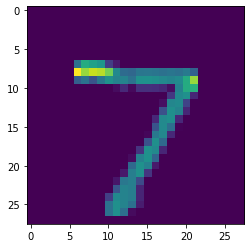

In [4]:
pred = model.predict([x_test])
import numpy as np
import matplotlib.pyplot as plt

print(np.argmax(pred[0]))
plt.imshow(x_test[0])
plt.show()
model.save("MNIST_model")
